<a href="https://colab.research.google.com/github/talonsob/Segunda-Entrega-Coderhouse-Api-Pobreza/blob/main/Desafio_FeatureSelection__Tom%C3%A1s_Alonso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
pob=pd.read_csv('probabilidad_api.csv')

In [ ]:
pob_m=pob.drop(['Unnamed: 0','poverty_gap_y','survey_acronym','survey_coverage','poverty_line_y','country_code','country_name','region_code_y','comparable_spell','reporting_level'], axis=1)

In [ ]:
pob_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101213 entries, 0 to 101212
Data columns (total 99 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   country                                101213 non-null  object 
 1   is_urban                               101213 non-null  int64  
 2   age                                    101213 non-null  int64  
 3   female                                 101213 non-null  int64  
 4   married                                101213 non-null  int64  
 5   religion                               101213 non-null  int64  
 6   relationship_to_hh_head                101213 non-null  int64  
 7   education_level                        101213 non-null  int64  
 8   literacy                               101213 non-null  int64  
 9   can_add                                101213 non-null  int64  
 10  can_divide                             101213 non-null  

In [ ]:
pob_m['bank_interest_rate'].fillna(0,inplace=True)
pob_m['mm_interest_rate'].fillna(0,inplace=True)
pob_m['mfi_interest_rate'].fillna(0,inplace=True)
pob_m['other_fsp_interest_rate'].fillna(0,inplace=True)
pob_m['education_level'].fillna(pob['education_level'].mean(), inplace=True)
pob_m['share_hh_income_provided'].fillna(pob['share_hh_income_provided'].mean(),inplace=True)
pob_m['median'].fillna(pob['median'].mean(), inplace=True)
pob_m['ppp'].fillna(pob['ppp'].mean(), inplace=True)
pob_m['reporting_pce'].fillna(pob['reporting_pce'].mean(), inplace=True)

<AxesSubplot:>

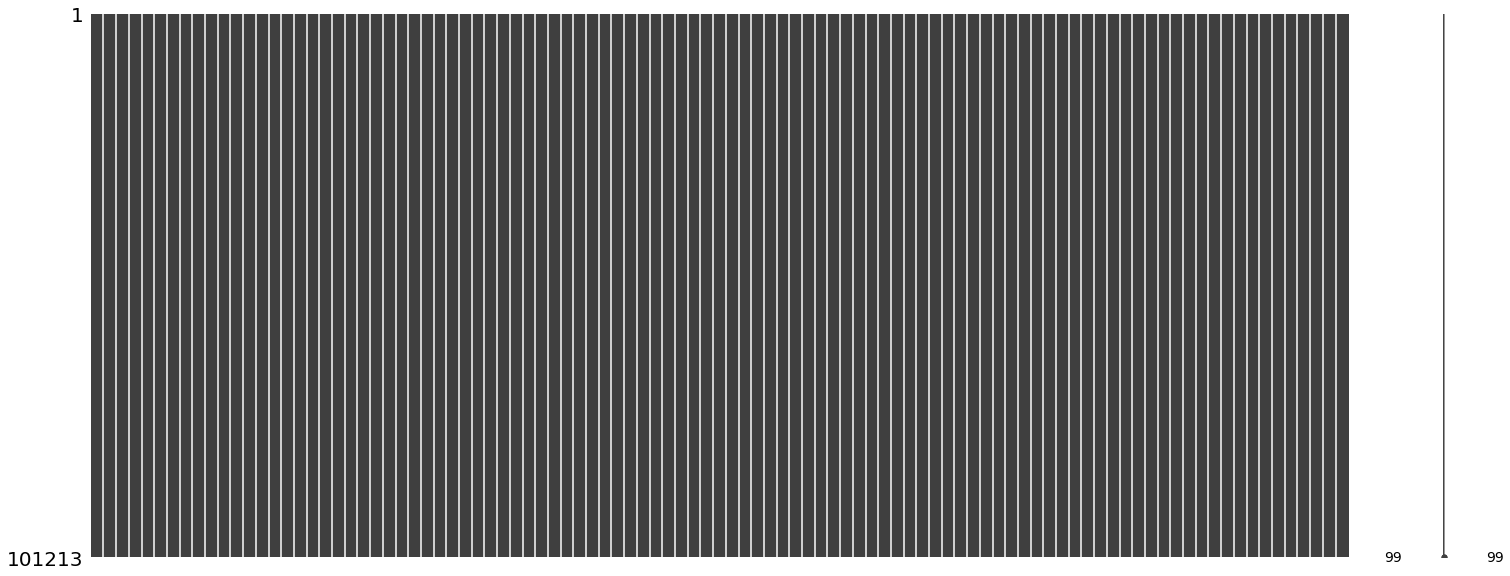

In [ ]:
import missingno as msno
msno.matrix(pob_m)

In [ ]:
pob_m.dtypes

country                object
is_urban                int64
age                     int64
female                  int64
married                 int64
                       ...   
headcount_y           float64
poverty_severity_y    float64
watts_y               float64
mean_y                float64
pop_in_poverty          int64
Length: 99, dtype: object

<AxesSubplot:xlabel='poverty_probability', ylabel='country'>

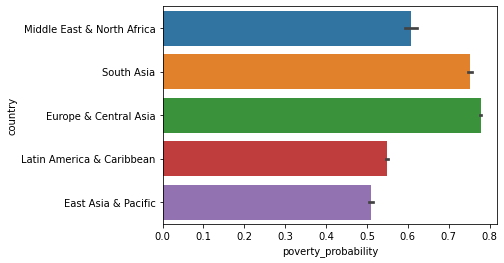

In [ ]:
sns.barplot(data=pob_m, x="poverty_probability", y="country")

<AxesSubplot:xlabel='welfare_type', ylabel='count'>

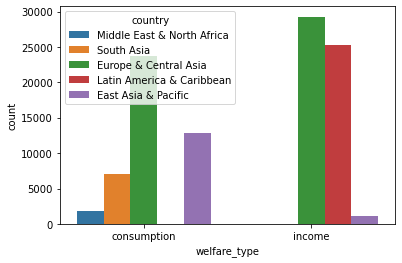

In [ ]:
sns.countplot(x="welfare_type", hue="country", data=pob_m)

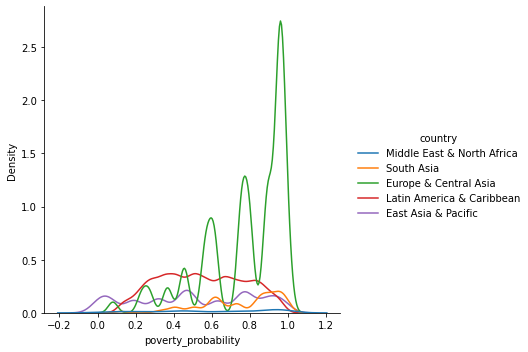

In [ ]:
sns.displot(pob_m, x="poverty_probability", hue="country", kind="kde")

<AxesSubplot:xlabel='gini', ylabel='country'>

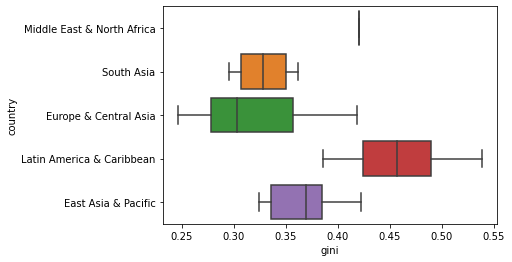

In [ ]:
sns.boxplot(data=pob_m, x="gini", y='country')

<AxesSubplot:xlabel='reporting_gdp', ylabel='country'>

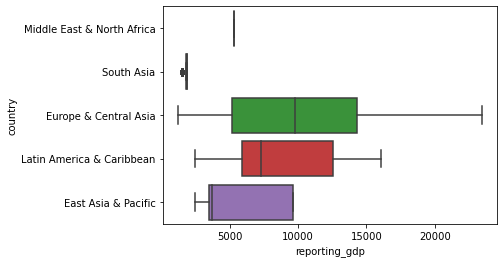

In [ ]:
sns.boxplot(data=pob_m, x="reporting_gdp", y='country')

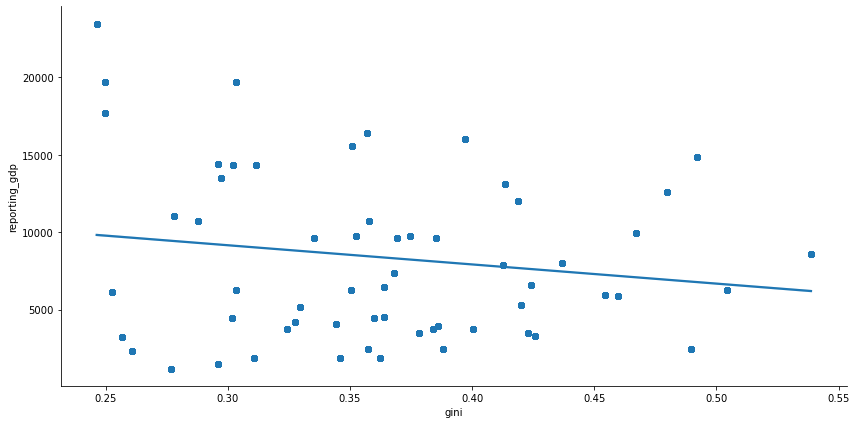

In [ ]:
sns.lmplot(x='gini',y='reporting_gdp',data=pob_m,aspect=2,height=6)

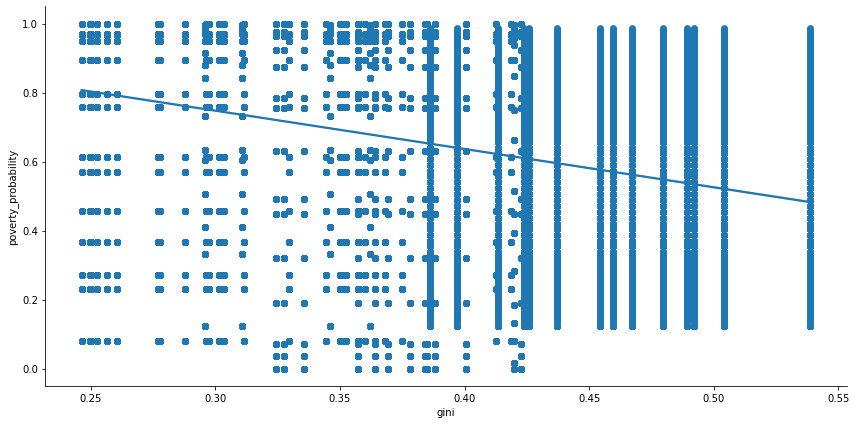

In [ ]:
sns.lmplot(x='gini',y='poverty_probability',data=pob_m,aspect=2,height=6)

In [ ]:
pob_muestra=pob_m.pivot_table(index='country',values=
['poverty_probability','reporting_gdp','gini'],aggfunc='mean') 
pob_muestra

,gini,poverty_probability,reporting_gdp
country,,,
East Asia & Pacific,0.369664,0.510899,5227.081920
Europe & Central Asia,0.317731,0.777992,10221.639666
Latin America & Caribbean,0.454871,0.549322,8390.226071
Middle East & North Africa,0.420000,0.607907,5293.754900
South Asia,0.328625,0.752714,1792.137525


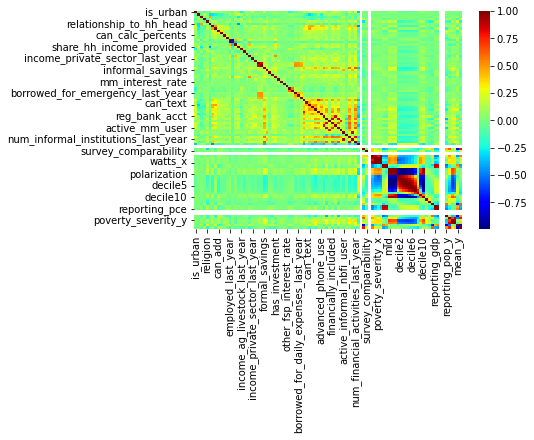

In [ ]:
corr = pob_m.corr()
sns.heatmap(corr, cmap= 'jet', annot= False);

In [ ]:
corr = pob_m.corr()
pos_corr= corr['poverty_probability']>=0
neg_corr= corr['poverty_probability']<0
corr['poverty_probability'][pos_corr].sort_values(ascending=False).round(2)

poverty_probability                      1.00
decile4                                  0.32
decile5                                  0.32
decile3                                  0.31
decile6                                  0.31
decile2                                  0.29
decile7                                  0.25
decile1                                  0.22
median                                   0.15
num_shocks_last_year                     0.15
avg_shock_strength_last_year             0.15
mean_y                                   0.12
reporting_pce                            0.12
mean_x                                   0.10
reporting_gdp                            0.10
income_ag_livestock_last_year            0.09
female                                   0.09
married                                  0.09
decile8                                  0.07
relationship_to_hh_head                  0.06
nonreg_active_mm_user                    0.04
borrowed_for_daily_expenses_last_y

In [ ]:
corr['poverty_probability'][neg_corr].sort_values(ascending=False).round(2)

employment_category_last_year        -0.01
cash_property_savings                -0.01
borrowing_recency                    -0.01
other_fsp_interest_rate              -0.01
employed_last_year                   -0.02
                                      ... 
formal_savings                       -0.36
num_financial_activities_last_year   -0.36
active_bank_user                     -0.37
reg_bank_acct                        -0.38
education_level                      -0.46
Name: poverty_probability, Length: 66, dtype: float64

In [ ]:
bool_col = pob_m.select_dtypes(include=['bool'])
for col in bool_col.columns.values:
    pob_m[col] = pob_m[col].astype('int64')

In [ ]:
float_col = pob_m.select_dtypes(include=['float64'])
for col in float_col.columns.values:
    pob_m[col] = pob_m[col].astype('int64')

In [ ]:
pob_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101213 entries, 0 to 101212
Data columns (total 99 columns):
 #   Column                                 Non-Null Count   Dtype 
---  ------                                 --------------   ----- 
 0   country                                101213 non-null  object
 1   is_urban                               101213 non-null  int64 
 2   age                                    101213 non-null  int64 
 3   female                                 101213 non-null  int64 
 4   married                                101213 non-null  int64 
 5   religion                               101213 non-null  int64 
 6   relationship_to_hh_head                101213 non-null  int64 
 7   education_level                        101213 non-null  int64 
 8   literacy                               101213 non-null  int64 
 9   can_add                                101213 non-null  int64 
 10  can_divide                             101213 non-null  int64 
 11  

In [ ]:
pob_m.describe()

,is_urban,age,female,married,religion,relationship_to_hh_head,education_level,literacy,can_add,can_divide,...,reporting_gdp,reporting_pce,is_interpolated,reporting_year_y,reporting_pop_y,headcount_y,poverty_severity_y,watts_y,mean_y,pop_in_poverty
count,101213.000000,101213.000000,101213.000000,101213.000000,101213.000000,101213.000000,101213.000000,101213.000000,101213.000000,101213.000000,...,101213.000000,101213.000000,101213.0,101213.0,1.012130e+05,101213.0,101213.0,101213.0,101213.000000,1.012130e+05
mean,0.340589,35.812998,0.598619,0.553022,3.560264,2.768172,1.325956,0.725391,0.853428,0.857597,...,8394.135417,4990.823540,0.0,2018.0,8.413546e+08,0.0,0.0,0.0,16.640955,2.053824e+07
std,0.473910,15.362296,0.490180,0.497183,0.668757,1.864958,0.794048,0.446319,0.353681,0.349464,...,5394.705544,2777.490104,0.0,0.0,6.007672e+08,0.0,0.0,0.0,4.078214,2.463403e+07
min,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1197.000000,1060.000000,0.0,2018.0,3.877846e+08,0.0,0.0,0.0,5.000000,8.795759e+06
25%,0.000000,24.000000,0.000000,0.000000,3.000000,1.000000,1.000000,0.000000,1.000000,1.000000,...,3920.000000,2814.000000,0.0,2018.0,4.930900e+08,0.0,0.0,0.0,18.000000,8.795759e+06
50%,0.000000,32.000000,1.000000,1.000000,4.000000,2.000000,1.000000,1.000000,1.000000,1.000000,...,6574.000000,4330.000000,0.0,2018.0,4.930900e+08,0.0,0.0,0.0,19.000000,8.795759e+06
75%,1.000000,45.000000,1.000000,1.000000,4.000000,5.000000,2.000000,1.000000,1.000000,1.000000,...,12573.000000,7249.000000,0.0,2018.0,6.362266e+08,0.0,0.0,0.0,19.000000,2.167998e+07
max,1.000000,115.000000,1.000000,1.000000,4.000000,6.000000,3.000000,1.000000,1.000000,1.000000,...,23466.000000,12372.000000,0.0,2018.0,2.091766e+09,0.0,0.0,0.0,19.000000,1.077965e+08


# PCA para variable x Probabilidad de Pobreza

In [ ]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
import statsmodels.api as sm

In [ ]:
pobpca=pob_m._get_numeric_data()


In [ ]:
pobpca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101213 entries, 0 to 101212
Data columns (total 95 columns):
 #   Column                                 Non-Null Count   Dtype 
---  ------                                 --------------   ----- 
 0   is_urban                               101213 non-null  int64 
 1   age                                    101213 non-null  int64 
 2   female                                 101213 non-null  int64 
 3   married                                101213 non-null  int64 
 4   religion                               101213 non-null  int64 
 5   relationship_to_hh_head                101213 non-null  int64 
 6   education_level                        101213 non-null  int64 
 7   literacy                               101213 non-null  int64 
 8   can_add                                101213 non-null  int64 
 9   can_divide                             101213 non-null  int64 
 10  can_calc_percents                      101213 non-null  int64 
 11  

<BarContainer object of 94 artists>

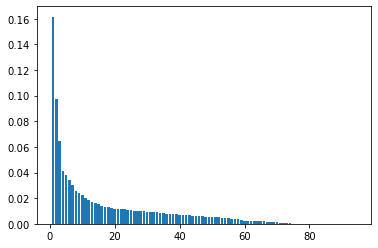

In [ ]:
plt.bar(x=np.arange(len(pobpca.columns)) + 1,height=modelo_pca.explained_variance_ratio_)

### se hace necesario normalizar los datos al existir muchos componentes y con valores muy dispersos lo que afecta la varianza

In [ ]:
proyecciones = pca_pipe.transform(X=pobpca)
proyecciones = pd.DataFrame(
    proyecciones,
    columns = pobpca.columns,
    index   = pobpca.index
)
proyecciones.head()

,is_urban,age,female,married,religion,relationship_to_hh_head,education_level,literacy,can_add,can_divide,...,reporting_gdp,reporting_pce,is_interpolated,reporting_year_y,reporting_pop_y,headcount_y,poverty_severity_y,watts_y,mean_y,pop_in_poverty
0,2.784650,-3.549619,1.021490,-3.802414,-3.740487,-2.311135,-2.160278,-0.068373,1.920757,0.047434,...,0.000255,0.000029,1.390957e-07,-1.498251e-07,-8.871376e-15,-5.512951e-15,-2.040675e-16,3.952036e-16,-8.858495e-18,-9.062865e-18
1,2.594651,-3.813434,1.027073,-3.304217,-3.979070,-2.154161,-3.154050,-0.256926,2.052739,0.364773,...,0.000255,0.000030,2.191313e-07,-5.930662e-08,-1.099815e-15,-7.067263e-15,1.537327e-16,4.290849e-16,-2.041862e-17,-1.631753e-17
2,2.872527,-3.500295,1.108975,-1.579817,-4.616518,-1.139743,-4.598130,-1.656255,1.964738,-0.166823,...,0.000252,0.000030,2.645905e-07,-3.362797e-08,-1.486658e-14,-1.106407e-14,1.151317e-16,-1.094112e-16,2.133134e-18,-4.925571e-18
3,2.692114,-3.743899,0.896448,-3.461240,-3.798283,-2.743125,-2.335441,0.417361,1.819099,0.478751,...,0.000261,0.000030,1.655122e-07,-1.221100e-07,-9.537510e-15,-7.955442e-15,8.965976e-17,1.841094e-16,-3.414502e-17,-2.501907e-17
4,3.391964,-2.213347,2.167448,-2.846127,-4.106358,-1.028487,-4.100393,-0.982972,1.858829,-0.657820,...,0.000255,0.000031,2.777613e-07,-6.550466e-09,-8.777701e-16,-1.772540e-14,3.794128e-16,-5.536377e-17,-3.674303e-17,-1.970524e-17


### Dentro del pipe se agrega la condicion de normalización "standard scaler" con lo que se reduce el impacto de las variables sobre la varianza más allá del esperado 

In [ ]:
pca_pipe2 = make_pipeline(StandardScaler(), PCA())
pca_pipe2.fit(proyecciones)
modelo_pca2 = principales.named_steps['pca']
print('Porcentaje de varianza explicada por cada componente')
print(modelo_pca2.explained_variance_ratio_)

Porcentaje de varianza explicada por cada componente
[1.61554792e-01 9.72112095e-02 6.44255209e-02 4.10177877e-02
 3.82767459e-02 3.39114704e-02 3.00895141e-02 2.53995892e-02
 2.41789620e-02 2.22807060e-02 2.01496895e-02 1.85392283e-02
 1.71043182e-02 1.66155637e-02 1.50903588e-02 1.41912188e-02
 1.34474596e-02 1.29921102e-02 1.22216825e-02 1.16787176e-02
 1.15464564e-02 1.12057491e-02 1.11809646e-02 1.07980914e-02
 1.06220739e-02 1.02505093e-02 1.01076304e-02 9.88178483e-03
 9.62005611e-03 9.42735275e-03 9.32233531e-03 8.99099120e-03
 8.95436055e-03 8.46938584e-03 8.42714938e-03 7.88838803e-03
 7.64107576e-03 7.41029187e-03 7.31365713e-03 6.99903360e-03
 6.84076461e-03 6.66339329e-03 6.54168540e-03 6.42462997e-03
 6.32720064e-03 6.21558719e-03 5.87416824e-03 5.53802157e-03
 5.49872362e-03 5.42070371e-03 5.08140995e-03 5.04577447e-03
 4.81356933e-03 4.56202434e-03 4.17024706e-03 4.07286268e-03
 3.89176473e-03 3.61120595e-03 3.05432079e-03 2.35536111e-03
 2.17427323e-03 2.16110723e-03 2

In [ ]:
pob_pca=pobpca.drop('pobreza',axis=1)

In [ ]:
# Entrenamiento modelo PCA con escalado de los datos para variable "Probabilidad de Pobreza"
# ==============================================================================
pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(pob_pca)

# Se extrae el modelo entrenado del pipeline
modelo_pca = pca_pipe.named_steps['pca']

In [ ]:
scaler=StandardScaler()
df = pob_pca.drop(['poverty_probability'], axis=1) # quito la variable dependiente "Y"
scaler.fit(df) # calculo la media para poder hacer la transformacion
X_scaled=scaler.transform(df)

### En n de componentes 40 corresponde al 90% de la varianza explicada

In [ ]:
#Instanciamos objeto PCA y aplicamos
pca=PCA(n_components=40) # Otra opción es instanciar pca sólo con dimensiones nuevas hasta obtener un mínimo "explicado" ej.: pca=PCA(.85)
pca.fit(X_scaled) # obtener los componentes principales
X_pca=pca.transform(X_scaled) 

In [ ]:
print("shape of X_pca", X_pca.shape)
expl = pca.explained_variance_ratio_
print(expl)
print('suma:',sum(expl[0:5]))

shape of X_pca (101213, 40)
[0.13443427 0.08150164 0.0534111  0.0408385  0.03460254 0.03291002
 0.03047477 0.02647053 0.02387189 0.02275301 0.02113585 0.01903588
 0.01880846 0.0184529  0.0173836  0.01657145 0.01588096 0.0154283
 0.01502491 0.01470407 0.01458651 0.01421936 0.01393808 0.01346304
 0.0131716  0.01294222 0.01245305 0.0119994  0.01188833 0.0115277
 0.01102397 0.01078942 0.01059253 0.01009072 0.00981668 0.00964298
 0.0094729  0.00917854 0.00903512 0.00862074]
suma: 0.34478805013773633


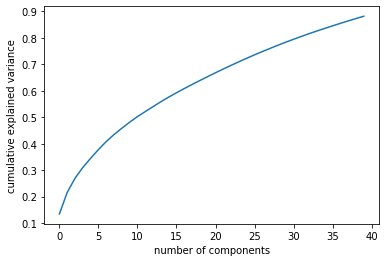

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

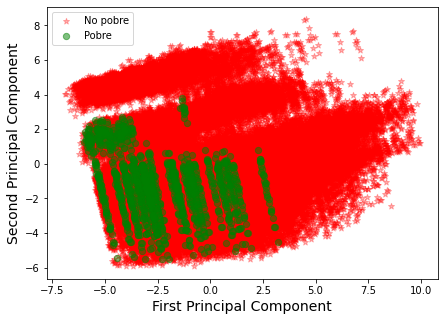

In [ ]:
Xax=X_pca[:,0]
Yax=X_pca[:,1]
labels=pob_pca['poverty_probability'].values
cdict={0:'red',1:'green'}
labl={0:'No pobre',1:'Pobre'}
marker={0:'*',1:'o'}
alpha={0:.3, 1:.5}
fig,ax=plt.subplots(figsize=(7,5))
fig.patch.set_facecolor('white')
for l in np.unique(labels):
    ix=np.where(labels==l)
    ax.scatter(Xax[ix],Yax[ix],c=cdict[l],label=labl[l],s=40,marker=marker[l],alpha=alpha[l])
 
plt.xlabel("First Principal Component",fontsize=14)
plt.ylabel("Second Principal Component",fontsize=14)
plt.legend()
plt.show()

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb
import multiprocessing

In [ ]:
X = pob_pca.drop(columns='poverty_probability')
y = pob_pca['poverty_probability']

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1),
                                        train_size   = 0.7,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

In [ ]:
modelo = LinearRegression(normalize=True)
modelo.fit(X = X_train, y = y_train)

C:\Users\talon\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


LinearRegression(normalize=True)

In [ ]:
predicciones = modelo.predict(X=X_test)
predicciones = predicciones.flatten()

# Error de test del modelo 
# ==============================================================================
rmse_ols = mean_squared_error(
            y_true  = y_test,
            y_pred  = predicciones,
            squared = False
           )
print("")
print(f"El error (rmse) de test es: {rmse_ols}")


El error (rmse) de test es: 0.10465055521072443


In [ ]:
pipe_modelado = make_pipeline(StandardScaler(), PCA(), LinearRegression())
pipe_modelado.fit(X=X_train, y=y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('pca', PCA()),
                ('linearregression', LinearRegression())])

In [ ]:
pipe_modelado.set_params

<bound method Pipeline.set_params of Pipeline(steps=[('standardscaler', StandardScaler()), ('pca', PCA()),
                ('linearregression', LinearRegression())])>

In [ ]:
predicciones = pipe_modelado.predict(X=X_test)
predicciones = predicciones.flatten()

# Error de test del modelo 
# ==============================================================================
rmse_pcr = mean_squared_error(
            y_true  = y_test,
            y_pred  = predicciones,
            squared = False
           )
print("")
print(f"El error (rmse) de test es: {rmse_pcr}")


El error (rmse) de test es: 0.1046509097604296


In [ ]:
# Grid de hiperparámetros evaluados
# ==============================================================================
param_grid = {'pca__n_components': [1, 2, 4, 6, 8, 10, 15, 20, 30, 50]}

# Búsqueda por grid search con validación cruzada
# ==============================================================================
grid = GridSearchCV(
        estimator  = pipe_modelado,
        param_grid = param_grid,
        scoring    = 'neg_root_mean_squared_error',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = KFold(n_splits=5), 
        refit      = True,
        verbose    = 0,
        return_train_score = True
       )

grid.fit(X = X_train, y = y_train)

# Resultados
# ==============================================================================
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head(3)

,param_pca__n_components,mean_test_score,std_test_score,mean_train_score,std_train_score
9,50,-0.106449,0.003896,-0.106440,0.000953
8,30,-0.106873,0.003921,-0.106892,0.000961
7,20,-0.106959,0.003903,-0.106992,0.000956


C:\Users\talon\anaconda3\lib\site-packages\pandas\core\indexes\base.py:6982: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)
C:\Users\talon\anaconda3\lib\site-packages\pandas\core\indexes\base.py:6982: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)
C:\Users\talon\AppData\Local\Temp\ipykernel_13112\444564737.py:7: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ax.fill_between(result

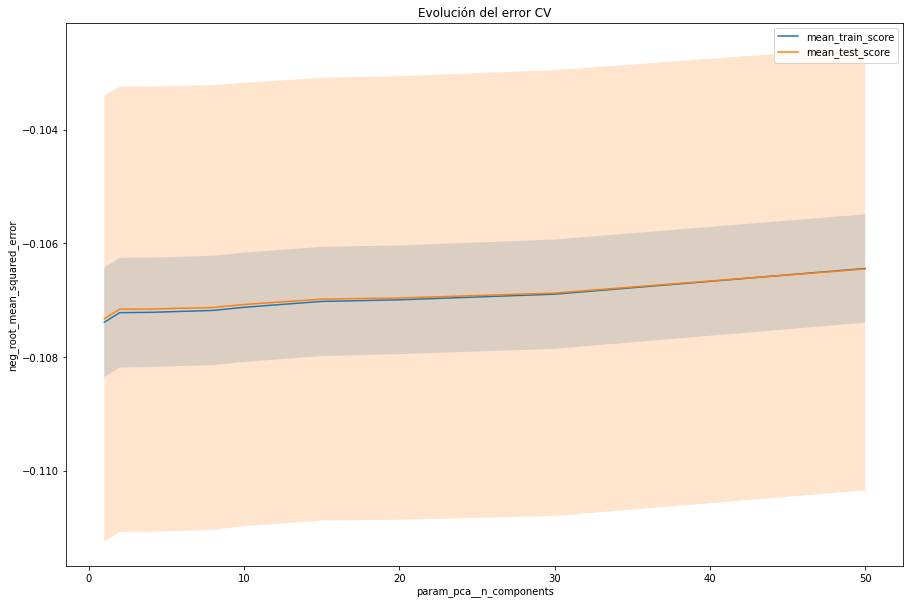

In [ ]:
# Gráfico resultados validación cruzada para cada hiperparámetro
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 10), sharey=True)

resultados.plot('param_pca__n_components', 'mean_train_score', ax=ax)
resultados.plot('param_pca__n_components', 'mean_test_score', ax=ax)
ax.fill_between(resultados.param_pca__n_components.astype(np.float),
                resultados['mean_train_score'] + resultados['std_train_score'],
                resultados['mean_train_score'] - resultados['std_train_score'],
                alpha=0.2)
ax.fill_between(resultados.param_pca__n_components.astype(np.float),
                resultados['mean_test_score'] + resultados['std_test_score'],
                resultados['mean_test_score'] - resultados['std_test_score'],
                alpha=0.2)
ax.legend()
ax.set_title('Evolución del error CV')
ax.set_ylabel('neg_root_mean_squared_error');

In [ ]:
# Mejores hiperparámetros por validación cruzada
# ==============================================================================
print("----------------------------------------")
print("Mejores hiperparámetros encontrados (cv)")
print("----------------------------------------")
print(grid.best_params_, ":", grid.best_score_, grid.scoring)

----------------------------------------
Mejores hiperparámetros encontrados (cv)
----------------------------------------
{'pca__n_components': 50} : -0.10644852025738136 neg_root_mean_squared_error


In [ ]:
# Predicciones test
# ==============================================================================
predicciones = pipe_modelado.predict(X=X_test)
predicciones = predicciones.flatten()

# Error de test del modelo 
# ==============================================================================
rmse_pcr = mean_squared_error(
            y_true  = y_test,
            y_pred  = predicciones,
            squared = False
           )
print("")
print(f"El error (rmse) de test es: {rmse_pcr}")


El error (rmse) de test es: 0.1046509097604296


In [ ]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
from collections import Counter
y= pob_pca.poverty_probability
X= pob_pca.drop(columns='poverty_probability', axis=1)
x_ros, y_ros = ros.fit_resample(X, y)
print('shape dataset original:', Counter(y))
print('Dataset modificado shape', Counter(y_ros))

shape dataset original: Counter({0: 100035, 1: 1178})
Dataset modificado shape Counter({0: 100035, 1: 100035})


In [ ]:
X_train,X_test, y_train, y_test = train_test_split(x_ros, y_ros, test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape)

(140049, 93) (60021, 93)


In [ ]:
params_grid = {
        'min_child_weight': [1, 5],
        'gamma': [0.5, 1],
        'subsample': [0.6, 0.8],
        'colsample_bytree': [0.6, 0.8],
        'max_depth': [5,6],
        'criterion':['entropy','gini']
        }

In [ ]:
model= xgb.XGBClassifier(learning_rate=0.001)
# Lista de hiperparametros
params_1 = {'criterion': 'gini', 'splitter': 'best', 'max_depth': 5}
params_2 = {'criterion': 'entropy', 'splitter': 'random', 'max_depth': 7}
params_3 = {'criterion': 'gini', 'splitter': 'random', 'max_depth': 10}

In [ ]:
grid_cv = RandomizedSearchCV(model, params_grid, scoring="accuracy", n_jobs=-1, cv=3)
grid_cv.fit(X_train, y_train)

print("Mejores parametros", grid_cv.best_params_)
print("Mejor score de CV", grid_cv.best_score_)
print(f'Accuracy del modelo = {round(accuracy_score(y_test, grid_cv.predict(X_test)), 5)}')

[16:11:20] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "criterion" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Mejores parametros {'subsample': 0.8, 'min_child_weight': 5, 'max_depth': 6, 'gamma': 0.5, 'criterion': 'gini', 'colsample_bytree': 0.6}
Mejor score de CV 0.9078108376353992
Accuracy del modelo = 0.91106
